In [1]:
import pandas as pd
import numpy as np
import os
import cv2
import tensorflow as tf
from tqdm import tqdm
import pathlib
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import re

In [2]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
path = 'G:/data/global-wheat-detection/'

In [3]:
import IPython.display as display

def caption_image(image_path):
    image_rel = pathlib.Path(image_path).relative_to(data_root)
    return "Image (CC BY 2.0) " + ' - '.join(attributions[str(image_rel)].split(' - ')[:-1])

In [4]:
train_df = pd.read_csv(f'{path}train.csv')
train_df.shape

(147793, 5)

In [5]:
train_df.head()

,image_id,width,height,bbox,source
0,b6ab77fd7,1024,1024,"[834.0, 222.0, 56.0, 36.0]",usask_1
1,b6ab77fd7,1024,1024,"[226.0, 548.0, 130.0, 58.0]",usask_1
2,b6ab77fd7,1024,1024,"[377.0, 504.0, 74.0, 160.0]",usask_1
3,b6ab77fd7,1024,1024,"[834.0, 95.0, 109.0, 107.0]",usask_1
4,b6ab77fd7,1024,1024,"[26.0, 144.0, 124.0, 117.0]",usask_1


In [6]:
new_columns = ['x_min','y_min', 'width', 'height']

In [7]:
train_df[new_columns] = pd.DataFrame(\
                      [re.findall('(\d+\.\d+)', x) for x in train_df.bbox.tolist()], index= train_df.index)
train_df = train_df[['image_id', 'bbox', 'source', 'x_min', 'y_min', 'width', 'height']]
train_df

,image_id,bbox,source,x_min,y_min,width,height
0,b6ab77fd7,"[834.0, 222.0, 56.0, 36.0]",usask_1,834.0,222.0,56.0,36.0
1,b6ab77fd7,"[226.0, 548.0, 130.0, 58.0]",usask_1,226.0,548.0,130.0,58.0
2,b6ab77fd7,"[377.0, 504.0, 74.0, 160.0]",usask_1,377.0,504.0,74.0,160.0
3,b6ab77fd7,"[834.0, 95.0, 109.0, 107.0]",usask_1,834.0,95.0,109.0,107.0
4,b6ab77fd7,"[26.0, 144.0, 124.0, 117.0]",usask_1,26.0,144.0,124.0,117.0
...,...,...,...,...,...,...,...
147788,5e0747034,"[64.0, 619.0, 84.0, 95.0]",arvalis_2,64.0,619.0,84.0,95.0
147789,5e0747034,"[292.0, 549.0, 107.0, 82.0]",arvalis_2,292.0,549.0,107.0,82.0
147790,5e0747034,"[134.0, 228.0, 141.0, 71.0]",arvalis_2,134.0,228.0,141.0,71.0
147791,5e0747034,"[430.0, 13.0, 184.0, 79.0]",arvalis_2,430.0,13.0,184.0,79.0


In [8]:
for i in new_columns:
    train_df[i] =train_df[i].astype(float)

In [9]:
img_dir = os.path.join(path, "train/")

In [10]:
ids_train = list(train_df['image_id'].unique())
x_train_filenames = []
for img_id in ids_train:
    x_train_filenames.append(os.path.join(img_dir, "{}.jpg".format(img_id)))

In [11]:
source_list = list(train_df['source'].unique())

In [12]:
train_df['source_id'] = train_df['source']

In [13]:
train_df.source_id.replace(source_list, [i for i in range (len(source_list))], inplace=True) 

In [14]:
def display_images(images): 
    f, ax = plt.subplots(3,3, figsize=(18,22))
    for i, image_id in enumerate(images):
        image_path = os.path.join(img_dir, f'{image_id}.jpg')
        image = Image.open(image_path)
        
        draw = ImageDraw.Draw(image)
        bboxes = train_df.loc[train_df['image_id'] == image_id]
        for j, row in bboxes.iterrows():    
            draw.rectangle([(row.get('x_min'), row.get('y_min')),\
                            (row.get('x_min') + row.get('width'), row.get('y_min') + row.get('height'))], width=3)
            
        ax[i//3, i%3].imshow(image) 
        image.close()       
        ax[i//3, i%3].axis('off')

        source = train_df[train_df['image_id'] == image_id]['source'].values[0]
        ax[i//3, i%3].set_title(f"image_id: {image_id}\nSource: {source}")

    plt.show() 

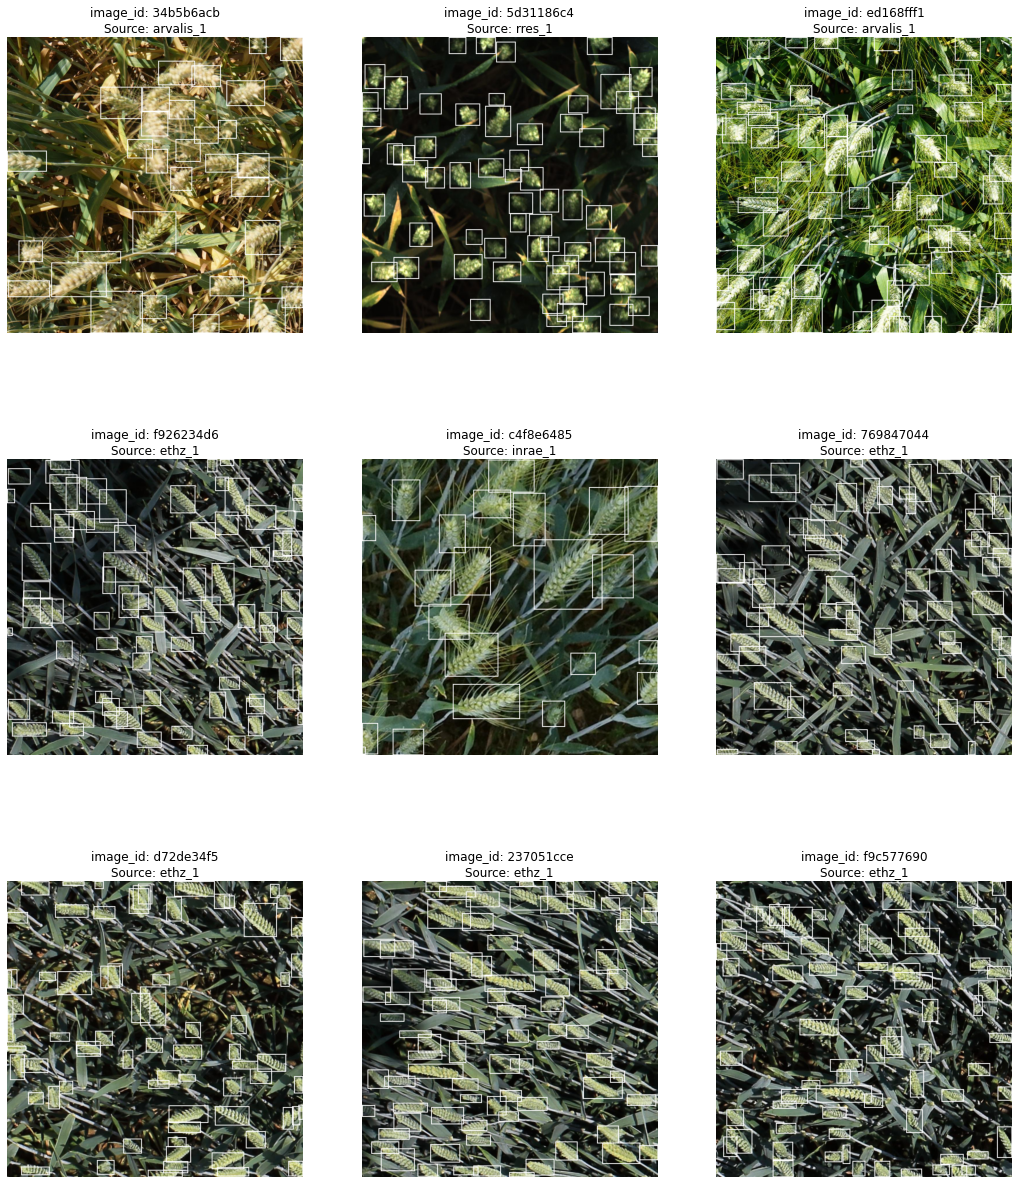

In [16]:
images = train_df.sample(n=9, random_state=34)['image_id'].values
display_images(images)